# Task 5.2. Local binaryisation
---
***Author: Piotr Skalski***

## Imports

In [1]:
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [53]:
IMAGE_SIZE = 256
WINDOW_SIZE = 15
SOURCE_DIR = "./../data/"
IMAGE_NAMES = [
    "rice.png",
    "coins.bmp",
    "katalog.bmp"
]

## Loading images

In [54]:
# building paths to files
file_paths = [os.path.join(SOURCE_DIR, file) for file in IMAGE_NAMES]
# loading files
files = [cv2.imread(path, 0) for path in file_paths]

## Display histograms

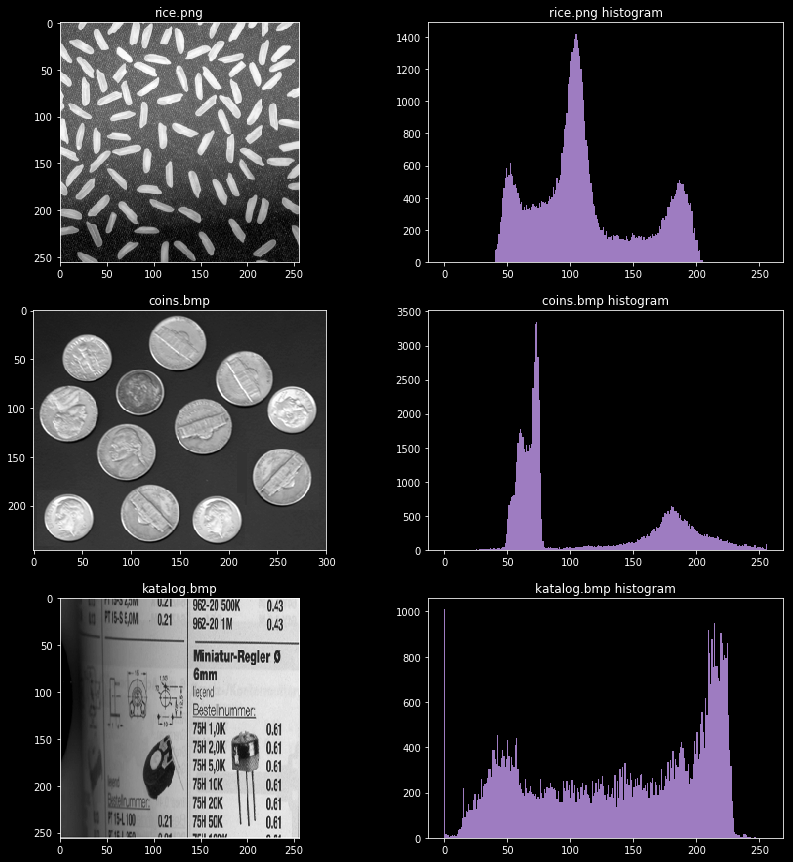

In [56]:
plt.style.use('dark_background')
f, axarr = plt.subplots(3, 2, figsize=(14, 15))
for index, file in enumerate(files):
    file_name = IMAGE_NAMES[index]
    axarr[index, 0].imshow(file,'gray')
    axarr[index, 0].set_title(file_name)
    axarr[index, 1].hist(file.ravel(), 256, [0,256], color = '#9E7CC1')
    axarr[index, 1].set_title("{} histogram".format(file_name))

## Definition of the additional function meanLT

In [57]:
def meanLT(x, y, W2, I, X, Y):
    elements_count = 0
    total = 0.0
    
    for i in range(-W2, W2 + 1):
        for j in range(-W2, W2 + 1):
            if ((i + x) >= 0 and (i + x) < X and (j + y) >= 0 and (j + y) < Y):
                
                elements_count += 1
                total += I[i + x, j + y]
    return total / elements_count

In [58]:
BW = files[0]
FILE = files[0]

X, Y = files[0].shape
for x in range(X):
    for y in range(Y):
        mean = meanLT(x, y, int(WINDOW_SIZE / 2), FILE, X, Y)
        if FILE[x, y] > mean:
            BW[x, y] = 255
        else:
            BW[x, y] = 0

## Display the meanLT histogram

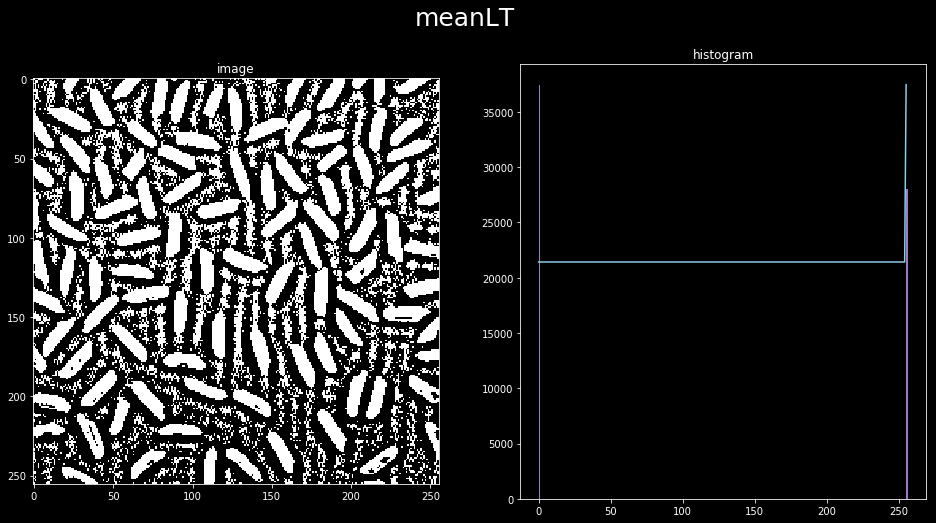

In [59]:
# creation of a cumulative histogram
hist,bins = np.histogram(BW.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('meanLT', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(BW, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(BW.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## Definition of the additional function stddevLT

In [60]:
def stddevLT(x, y, W2, I, M, X, Y):
    elements_count = 0
    total = 0.0
    
    for i in range(-W2, W2 + 1):
        for j in range(-W2, W2 + 1):
            if ((i + x) >= 0 and (i + x) < X and (j + y) >= 0 and (j + y) < Y):
                
                elements_count += 1
                total += (I[i + x, j + y] - M)**2
                
    return (total / elements_count)**0.5

In [61]:
BW = files[0]
FILE = files[0]

X, Y = files[0].shape
for x in range(X):
    for y in range(Y):
        mean = meanLT(x, y, int(WINDOW_SIZE / 2), FILE, X, Y)
        std = stddevLT(x, y, int(WINDOW_SIZE / 2), mean, FILE, X, Y)
        Tmin = mean*(1-0.15*(std/128 - 1))
#         Tmax = mean*(1+0.15*(std/128 - 1))
        if FILE[x, y] > Tmin:
            BW[x, y] = 255
        else:
            BW[x, y] = 0

IndexError: invalid index to scalar variable.